In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, confusion_matrix,roc_curve,auc

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [25]:
df= pd.read_csv("credit_risk_dataset.csv")
# Drop 'cb_person_default_on_file' feature as per requirement
df.drop(columns=['cb_person_default_on_file'], inplace=True)

# Print the first 5 rows
print("\nFirst 5 Rows After Dropping 'cb_person_default_on_file':")
print(df.head())


First 5 Rows After Dropping 'cb_person_default_on_file':
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income  cb_person_cred_hist_length  
0                 0.59                         

In [26]:
print(df.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


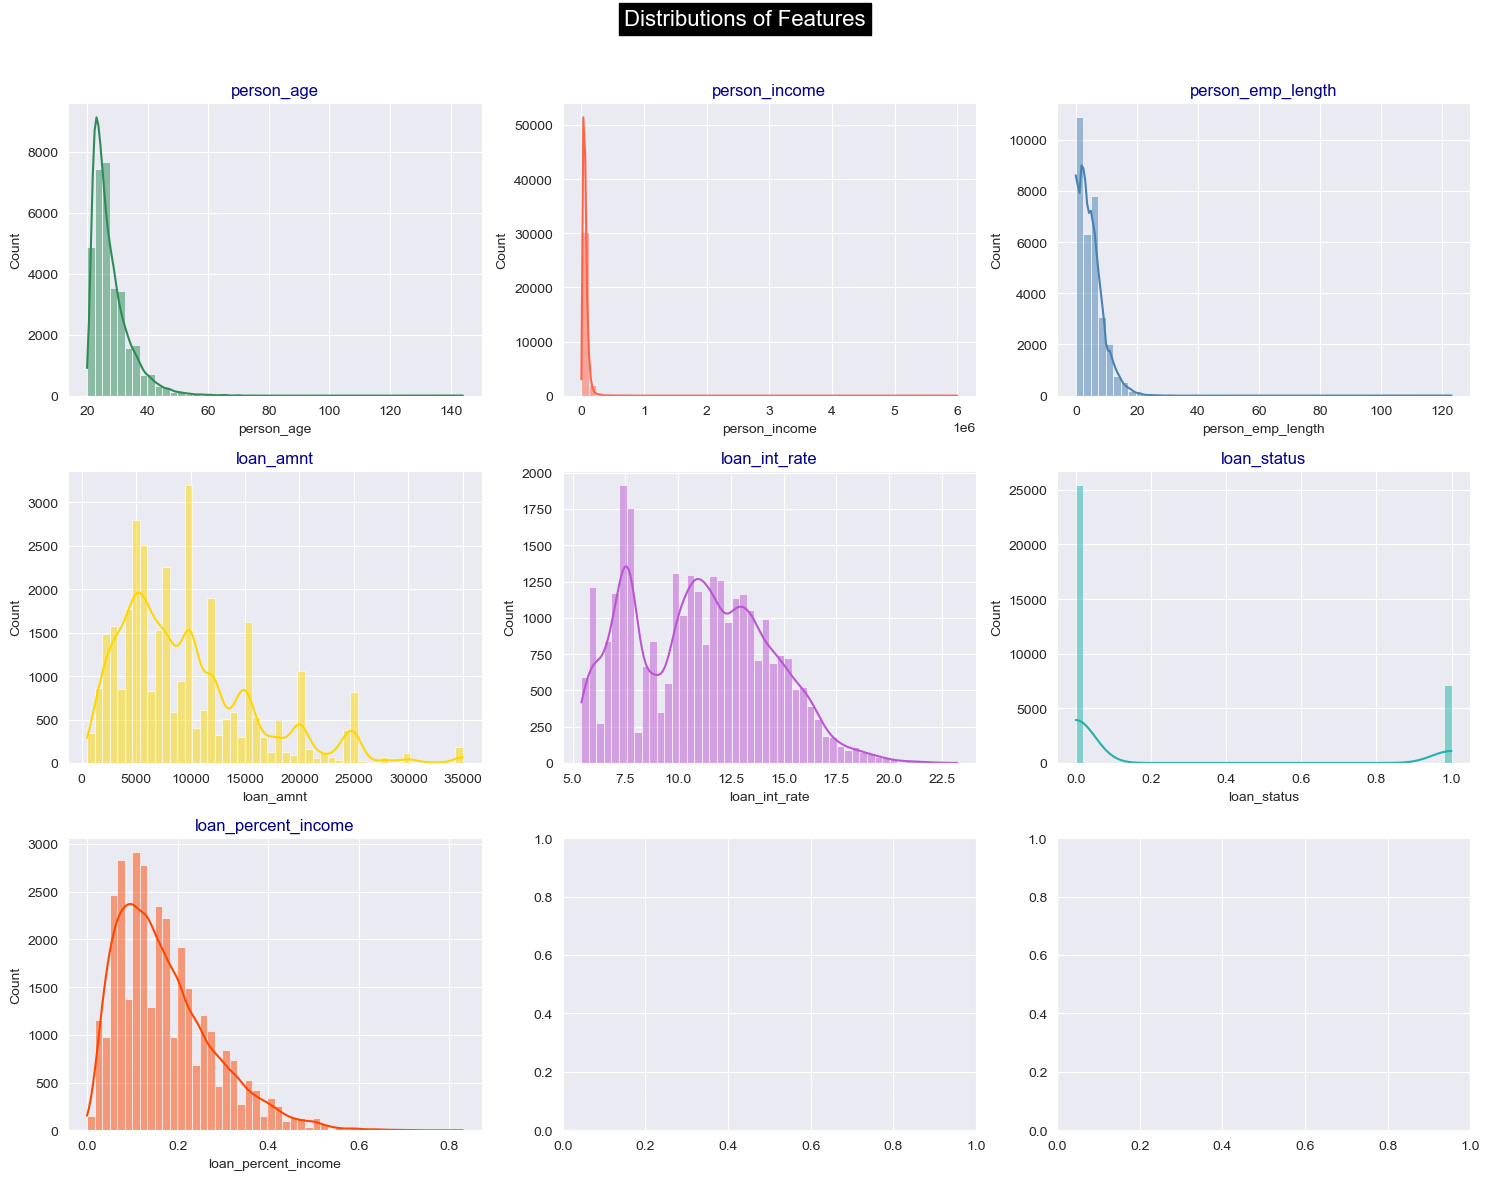

In [28]:
sns.set_style("darkgrid")

# Select numeric columns
numeric_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Distributions of Features", fontsize=16, color="white", backgroundcolor="black")

axes = axes.flatten()

# Generate histograms with different colors
colors = ["#2E8B57", "#FF6347", "#4682B4", "#FFD700", "#BA55D3", "#20B2AA", "#FF4500"]

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i], color=colors[i % len(colors)])
    axes[i].set_title(col, fontsize=12, color="darkblue")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

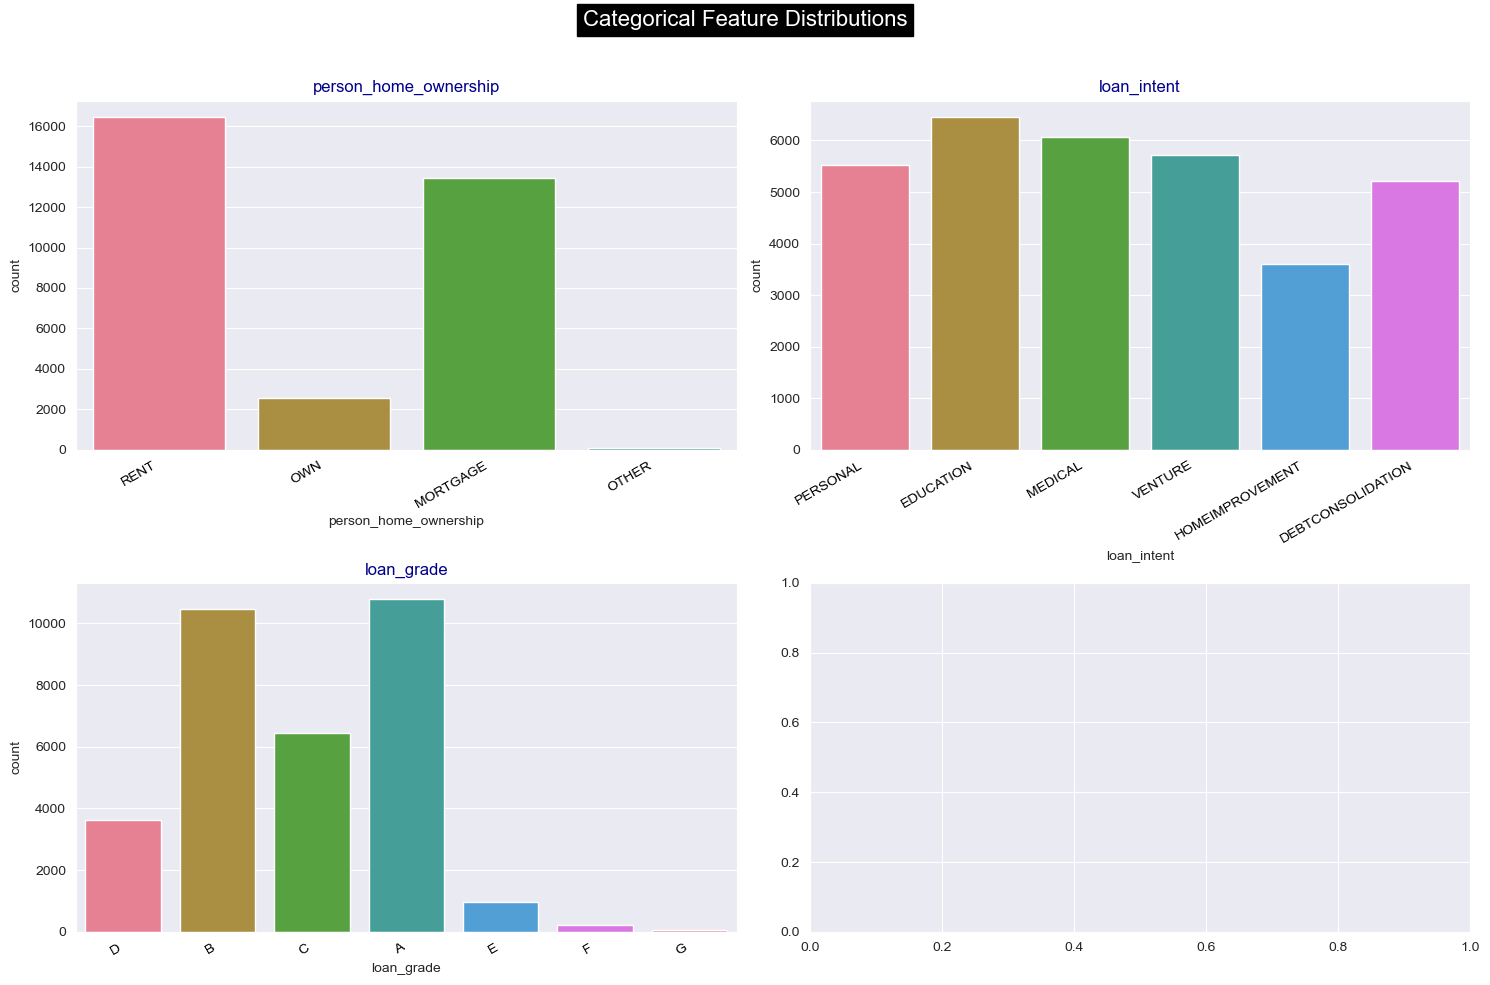

In [29]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']

for col in categorical_cols:
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found in dataset!")

df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle("Categorical Feature Distributions", fontsize=16, color="white", backgroundcolor="black")

# Flatten axes array for easy iteration
axes = axes.flatten()

# Use a colorful palette
palette = sns.color_palette("husl")  # Changed to avoid palette errors

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i], palette=palette)
    axes[i].set_title(col, fontsize=12, color="darkblue")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, ha="right", fontsize=10, color="black")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [30]:
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64


In [31]:
# Fill missing numerical values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
df.fillna(df.mode().iloc[0], inplace=True)

In [32]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical variables and store mappings
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

    # Print label mapping for each categorical feature
    print(f"Label Encoding for {col}:")
    for i, class_name in enumerate(le.classes_):
        print(f"  {class_name} -> {i}")
    print("\n" + "-" * 30 + "\n")  # Separator for readability

# Check dataset after encoding
print(df.head())

Label Encoding for person_home_ownership:
  MORTGAGE -> 0
  OTHER -> 1
  OWN -> 2
  RENT -> 3

------------------------------

Label Encoding for loan_intent:
  DEBTCONSOLIDATION -> 0
  EDUCATION -> 1
  HOMEIMPROVEMENT -> 2
  MEDICAL -> 3
  PERSONAL -> 4
  VENTURE -> 5

------------------------------

Label Encoding for loan_grade:
  A -> 0
  B -> 1
  C -> 2
  D -> 3
  E -> 4
  F -> 5
  G -> 6

------------------------------

   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      3              123.0   
1          21           9600                      2                5.0   
2          25           9600                      0                1.0   
3          23          65500                      3                4.0   
4          24          54400                      3                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            4           3      35000          16.02    

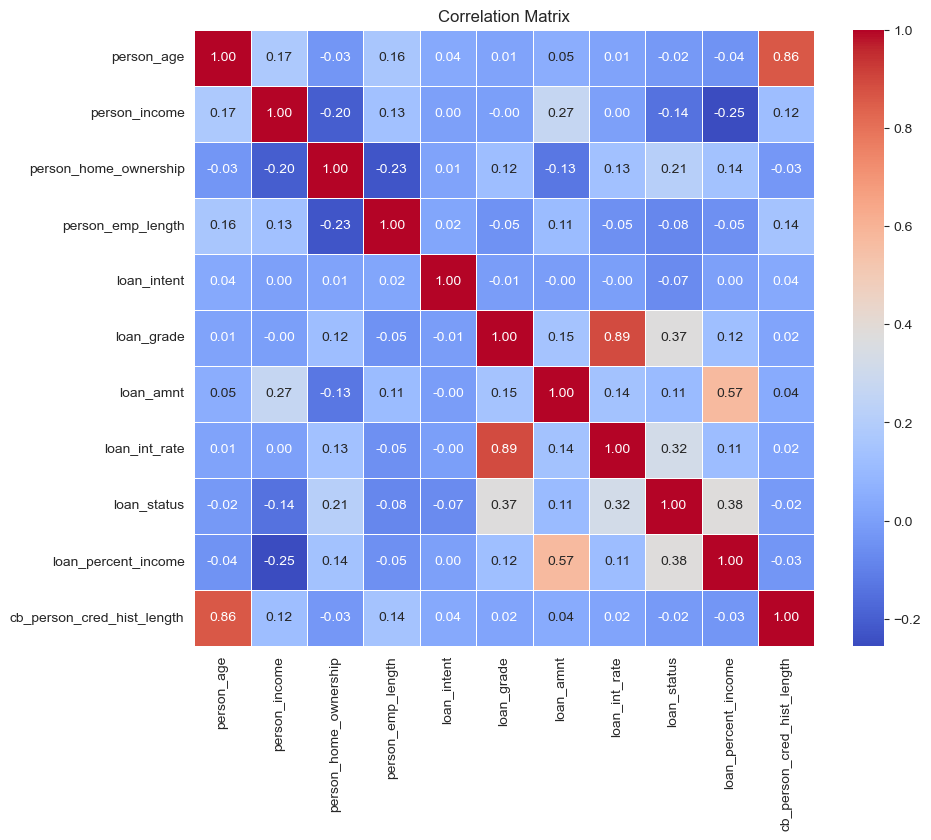

In [12]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [33]:
# Separate features and target variable
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']  # Target

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


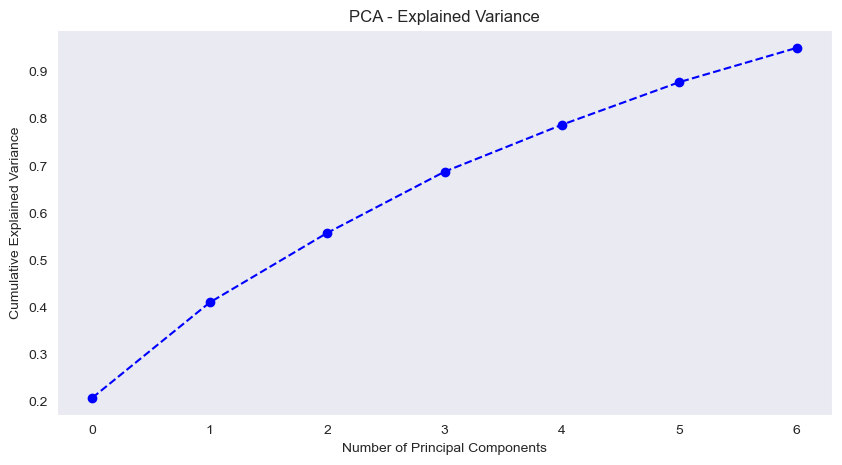

In [35]:
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot PCA variance explained
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()
plt.show()

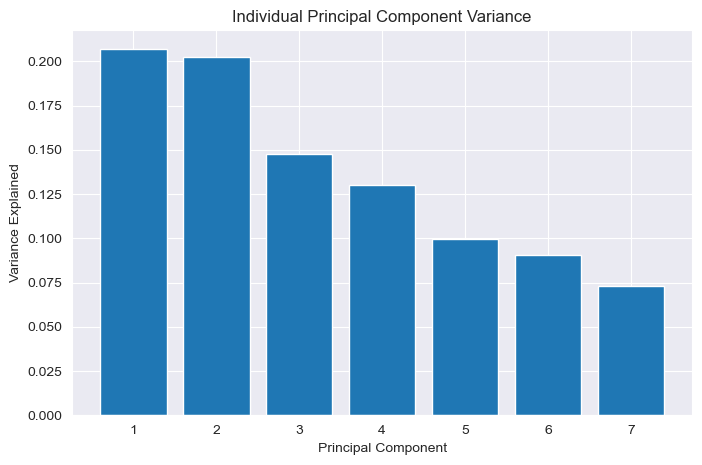

In [36]:
# Plot Individual Principal Component Variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Individual Principal Component Variance")
plt.show()

In [37]:
# Build ANN Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
print("\n Model Summary:")
model.summary()

# Train the ANN
history = model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=50, batch_size=32, verbose=1)


 Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6630 - loss: 0.6146 - val_accuracy: 0.8327 - val_loss: 0.3924
Epoch 2/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8394 - loss: 0.3930 - val_accuracy: 0.8447 - val_loss: 0.3704
Epoch 3/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8496 - loss: 0.3707 - val_accuracy: 0.8504 - val_loss: 0.3586
Epoch 4/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8561 - loss: 0.3546 - val_accuracy: 0.8562 - val_loss: 0.3505
Epoch 5/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8567 - loss: 0.3531 - val_accuracy: 0.8489 - val_loss: 0.3551
Epoch 6/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8571 - loss: 0.3520 - val_accuracy: 0.8574 - val_loss: 0.3464
Epoch 7/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8608 - loss: 0.3486 - val_accuracy: 0.8561 - val_loss: 0.3450
Epoch 8/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8595 - loss: 0.3443 - val_accuracy: 0.

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model Accuracy: 0.8783

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      5072
           1       0.95      0.48      0.64      1445

    accuracy                           0.88      6517
   macro avg       0.91      0.74      0.78      6517
weighted avg       0.89      0.88      0.86      6517



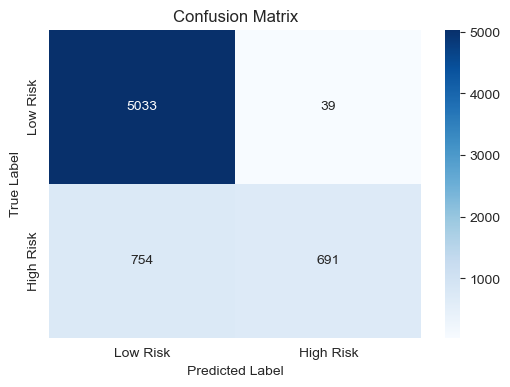

In [38]:
# Get predictions (0 or 1) 
y_pred_prob = model.predict(X_test_pca)
y_pred = (y_pred_prob > 0.5).astype(int)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

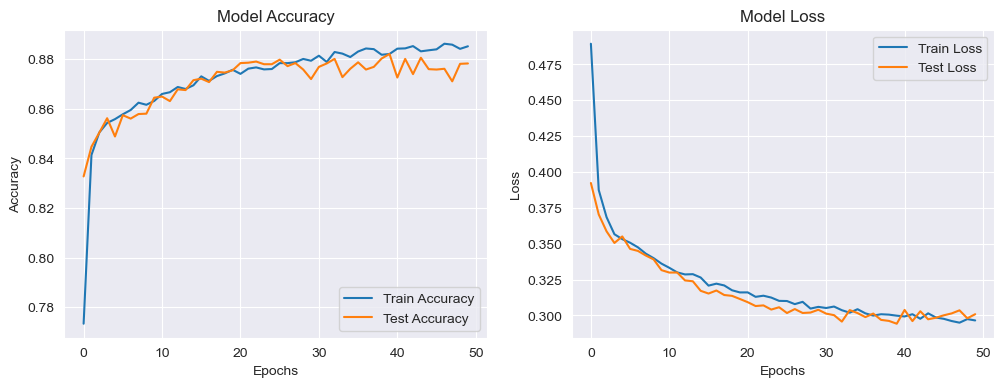

In [39]:
# Plot Training History
plt.figure(figsize=(12,4))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.show()

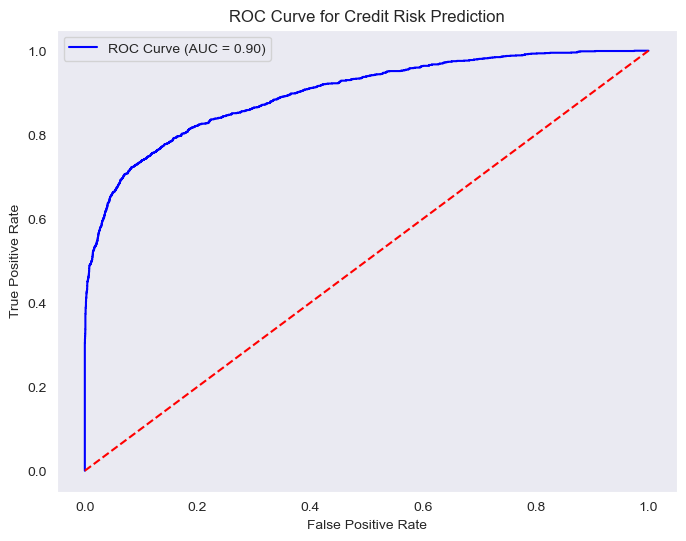

In [40]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # Reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Credit Risk Prediction")
plt.legend()
plt.grid()
plt.show()

In [41]:
# Get predicted probabilities
y_pred_prob = model.predict(X_test_pca)

# Convert probabilities into class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Display first 10 predictions
print("Predicted Class Labels:", y_pred[:10].flatten())
print("Predicted Probabilities:", y_pred_prob[:10].flatten())

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted Class Labels: [0 0 0 1 1 0 0 0 0 0]
Predicted Probabilities: [0.08445045 0.25492388 0.1282398  0.9999342  0.7732345  0.06833159
 0.11138984 0.01607826 0.08167516 0.02841587]


In [42]:
# Get the exact list of features used in training
expected_features = X_train.columns.tolist()
print("Expected Feature Names:", expected_features)

Expected Feature Names: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [47]:
# Function to get user input for prediction
def get_user_input():
    print("\nEnter values for prediction:")

    # Numerical inputs with example values
    person_age = float(input("Enter Age (e.g., 30, 40, 50): "))
    person_income = float(input("Enter Income (e.g., 45000, 60000, 75000): "))
    person_emp_length = float(input("Enter Employment Length in years (e.g., 5, 7, 10): "))
    loan_amnt = float(input("Enter Loan Amount (e.g., 10000, 15000, 25000): "))
    loan_int_rate = float(input("Enter Loan Interest Rate % (e.g., 10.5, 12.0, 14.5): "))
    loan_percent_income = float(input("Enter Loan Percent Income (e.g., 0.20, 0.25, 0.30): "))
    cb_person_cred_hist_length = float(input("Enter Credit History Length in years (e.g., 6, 8, 12): "))

    # Categorical inputs with label mapping
    print("\nLoan Grade Encoding:")
    print("A -> 0, B -> 1, C -> 2, D -> 3, E -> 4, F -> 5, G -> 6 ")
    loan_grade = int(input("Enter Loan Grade (choose from above): "))

    print("\nLoan Intent Encoding:")
    print("PERSONAL -> 0, EDUCATION -> 1, MEDICAL -> 2, VENTURE -> 3, HOMEIMPROVEMENT -> 4, DEBTCONSOLIDATION -> 5")
    loan_intent = int(input("Enter Loan Intent (choose from above): "))

    print("\nHome Ownership Encoding:")
    print("RENT -> 0, MORTGAGE -> 1, OWN -> 2, OTHER -> 3")
    person_home_ownership = int(input("Enter Home Ownership (choose from above): "))

    # Return input as dictionary
    return {
        'person_age': person_age,
        'person_income': person_income,
        'person_emp_length': person_emp_length,
        'loan_amnt': loan_amnt,
        'loan_int_rate': loan_int_rate,
        'loan_percent_income': loan_percent_income,
        'cb_person_cred_hist_length': cb_person_cred_hist_length,
        'loan_grade': loan_grade,
        'loan_intent': loan_intent,
        'person_home_ownership': person_home_ownership
    }

# Get user input
user_data = get_user_input()

# Convert to DataFrame
new_df_user = pd.DataFrame([user_data])

# Reorder columns to match training data order
new_df_user = new_df_user[expected_features]

# Display user input
print("\nUser Entered Data for Prediction:")
print(new_df_user)



Enter values for prediction:


Enter Age (e.g., 30, 40, 50):  45
Enter Income (e.g., 45000, 60000, 75000):  65000
Enter Employment Length in years (e.g., 5, 7, 10):  3
Enter Loan Amount (e.g., 10000, 15000, 25000):  60000
Enter Loan Interest Rate % (e.g., 10.5, 12.0, 14.5):  14.0
Enter Loan Percent Income (e.g., 0.20, 0.25, 0.30):  0.30
Enter Credit History Length in years (e.g., 6, 8, 12):  3



Loan Grade Encoding:
A -> 0, B -> 1, C -> 2, D -> 3, E -> 4, F -> 5, G -> 6 


Enter Loan Grade (choose from above):  3



Loan Intent Encoding:
PERSONAL -> 0, EDUCATION -> 1, MEDICAL -> 2, VENTURE -> 3, HOMEIMPROVEMENT -> 4, DEBTCONSOLIDATION -> 5


Enter Loan Intent (choose from above):  0



Home Ownership Encoding:
RENT -> 0, MORTGAGE -> 1, OWN -> 2, OTHER -> 3


Enter Home Ownership (choose from above):  2



User Entered Data for Prediction:
   person_age  person_income  person_home_ownership  person_emp_length  \
0        45.0        65000.0                      2                3.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            0           3    60000.0           14.0                  0.3   

   cb_person_cred_hist_length  
0                         3.0  


In [50]:
# Scale the user input data
new_scaled_user = scaler.transform(new_df_user)

# Apply PCA transformation
new_pca_user = pca.transform(new_scaled_user)


In [51]:
# Make prediction
new_pred_prob_user = model.predict(new_pca_user)
new_pred_user = (new_pred_prob_user > 0.5).astype(int)

# Output results
print("\nPrediction Result for User Input:")
print(f"Predicted Probability: {new_pred_prob_user[0][0]:.4f}")
print(f"Predicted Credit Risk: {'High Risk(More likely to default on the loan)' if new_pred_user[0][0] == 1 else 'Low Risk(less likely to default on the loan)'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

Prediction Result for User Input:
Predicted Probability: 0.2820
Predicted Credit Risk: Low Risk(less likely to default on the loan)
